In [31]:
from pprint import pprint
from langchain_core.messages import AIMessage, HumanMessage

messages = [AIMessage(content=f"So you said you were learning about Machine Learning?", name="Model")]
messages.append(HumanMessage(content=f"Yes, that's right.",name="Brijesh"))
messages.append(AIMessage(content=f"Great, what would you like to learn about.", name="Model"))
messages.append(HumanMessage(content=f"I want to learn about it's usecase, it's process.", name="Brijesh"))

for m in messages:
    m.pretty_print()

================================== Ai Message ==================================
Name: Model

So you said you were learning about Machine Learning?
================================ Human Message =================================
Name: Brijesh

Yes, that's right.
================================== Ai Message ==================================
Name: Model

Great, what would you like to learn about.
================================ Human Message =================================
Name: Brijesh

I want to learn about it's usecase, it's process.


In [32]:
import os
from dotenv import load_dotenv
load_dotenv(dotenv_path=os.path.join('studio', '.env'))

True

In [33]:
from langchain_openai import ChatOpenAI
llm = ChatOpenAI(model="gpt-4o")
result = llm.invoke(messages)
type(result)

langchain_core.messages.ai.AIMessage

In [34]:
result

AIMessage(content="Certainly! Machine learning (ML) is a subset of artificial intelligence (AI) that involves the development of algorithms that allow computers to learn from and make decisions based on data. Here’s a basic overview of its use cases and the process involved:\n\n### Use Cases of Machine Learning\n1. **Finance**: \n   - Fraud detection: Identifying unusual patterns in transactions that may indicate fraudulent activity.\n   - Algorithmic trading: Using historical data to predict and make trade decisions.\n\n2. **Healthcare**:\n   - Disease diagnosis: Analyzing medical images or genetic information to assist in diagnosing diseases.\n   - Personalized treatment plans: Recommending treatments based on individual patient data.\n\n3. **Retail**:\n   - Recommendation systems: Suggesting products to customers based on previous purchases and browsing history.\n   - Inventory management: Predicting demand for products to optimize stock levels.\n\n4. **Automotive**:\n   - Autonomou

In [35]:
result.response_metadata

{'token_usage': {'completion_tokens': 655,
  'prompt_tokens': 66,
  'total_tokens': 721,
  'completion_tokens_details': {'accepted_prediction_tokens': 0,
   'audio_tokens': 0,
   'reasoning_tokens': 0,
   'rejected_prediction_tokens': 0},
  'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}},
 'model_name': 'gpt-4o-2024-08-06',
 'system_fingerprint': 'fp_f64f290af2',
 'id': 'chatcmpl-CQzatv5o59w4Fzryc0PL3tm7t7m6i',
 'service_tier': 'default',
 'finish_reason': 'stop',
 'logprobs': None}

In [36]:
def multiply(a: int, b: int) -> int:
    """Multiply a and b.

    Args:
        a: first int
        b: second int
    """
    return a * b

llm_with_tools = llm.bind_tools([multiply])

In [37]:
tool_call = llm_with_tools.invoke([HumanMessage(content=f"What is 5 multiplied by 6?", name="Brijesh")])

In [38]:
tool_call.tool_calls

[{'name': 'multiply',
  'args': {'a': 5, 'b': 6},
  'id': 'call_1d8RMw7w5LHLu5dOlpFIozEY',
  'type': 'tool_call'}]

In [39]:
from typing_extensions import TypedDict
from langchain_core.messages import AnyMessage

class MessagesState(TypedDict):
    messages: list[AnyMessage]

In [40]:
from typing import Annotated
from langgraph.graph.message import add_messages

class MessagesState(TypedDict):
    messages: Annotated[list[AnyMessage], add_messages]

In [41]:
from langgraph.graph import MessagesState

class MessagesState(MessagesState):
    # Add any keys needed beyond messages, which is pre-built 
    pass

In [42]:
# Initial state
initial_messages = [AIMessage(content="Hello! How can I assist you?", name="Model"),
                    HumanMessage(content="I have some confusion in LangGraph.", name="Brijesh")
                   ]

# New message to add
new_message = AIMessage(content="Sure, I can help with that! What is your query?", name="Model")

# Test
add_messages(initial_messages , new_message)

[AIMessage(content='Hello! How can I assist you?', additional_kwargs={}, response_metadata={}, name='Model', id='5768b4d6-0590-4f1f-805d-f73010fca7de'),
 HumanMessage(content='I have some confusion in LangGraph.', additional_kwargs={}, response_metadata={}, name='Brijesh', id='7dc8d388-1bc3-43ce-b8c2-a8b9c2f09fd8'),
 AIMessage(content='Sure, I can help with that! What is your query?', additional_kwargs={}, response_metadata={}, name='Model', id='319933f3-c32d-4d8e-8391-3b163a384b56')]

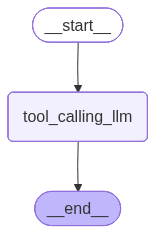

In [43]:
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END
    
# Node
def tool_calling_llm(state: MessagesState):
    return {"messages": [llm_with_tools.invoke(state["messages"])]}

# Build graph
builder = StateGraph(MessagesState)
builder.add_node("tool_calling_llm", tool_calling_llm)
builder.add_edge(START, "tool_calling_llm")
builder.add_edge("tool_calling_llm", END)
graph = builder.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))

In [44]:
messages = graph.invoke({"messages": HumanMessage(content="Hello!")})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

Hello!
================================== Ai Message ==================================

Hello! How can I assist you today?


In [45]:
messages = graph.invoke({"messages": HumanMessage(content="Multiply 5 and 6?", name="Brijesh")})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================
Name: Brijesh

Multiply 5 and 6?
================================== Ai Message ==================================
Tool Calls:
  multiply (call_5Kj0UITpOGqVL0XuRNuRnErw)
 Call ID: call_5Kj0UITpOGqVL0XuRNuRnErw
  Args:
    a: 5
    b: 6
